In [15]:
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import config

In [2]:
#sqlalcehmy database connection
database = f'postgres://{config.user}:{config.db_password}@{config.host}/postgres'
engine = create_engine(database)

In [3]:
beer_db = pd.read_sql_query('''SELECT *
                    FROM beers as be
                    LEFT JOIN breweries as br
                    ON (be.brewery_id = br.brewery_id)
                    ;''',con=engine)
beer_db.head()

,abv,ibu,beer_id,beer_name,style,brewery_id,ounces,brewery_id,brewery_name,city,state
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
1,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,368,21st Amendment Brewery,San Francisco,CA
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,368,21st Amendment Brewery,San Francisco,CA
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,368,21st Amendment Brewery,San Francisco,CA
4,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,368,21st Amendment Brewery,San Francisco,CA


In [4]:
# Seperate dataset into features (X) and target (y)

X = beer_db[['abv', 'ibu']] # Features
y = beer_db['style'] # Target

# splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
# Creating scaler instance

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train

85              American Porter
1292               American IPA
384            Belgian Pale Ale
641                  Hefeweizen
433      Saison / Farmhouse Ale
                 ...           
808     Belgian Strong Dark Ale
960      Fruit / Vegetable Beer
478                American IPA
50             American Pilsner
114         American Pale Lager
Name: style, Length: 928, dtype: object

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2,
                          n_informative=2, n_redundant=0,
                          random_state=48, shuffle=False)

rfc = RandomForestClassifier(n_estimators=128, random_state=48)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test,y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

                                     precision    recall  f1-score   support

                   Abbey Single Ale       0.00      0.00      0.00         2
                            Altbier       0.00      0.00      0.00         4
             American Adjunct Lager       0.67      0.40      0.50         5
           American Amber / Red Ale       0.22      0.20      0.21        25
         American Amber / Red Lager       0.00      0.00      0.00         1
                American Barleywine       0.00      0.00      0.00         0
                 American Black Ale       0.00      0.00      0.00         2
                American Blonde Ale       0.47      0.35      0.40        20
                 American Brown Ale       0.25      0.18      0.21        11
            American Dark Wheat Ale       1.00      0.50      0.67         2
     American Double / Imperial IPA       0.76      0.84      0.80        19
   American Double / Imperial Stout       0.50      0.50      0.50         

C:\Users\chrer\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chrer\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
tr_sc = pd.concat([X_train,y_train], axis=1)
tr_sc = tr_sc.sort_values(by=['abv', 'ibu'])

In [10]:
tr_sc.head(20)

,abv,ibu,style
1317,0.028,15.0,American Pilsner
783,0.034,6.0,Berliner Weissbier
18,0.035,11.0,Berliner Weissbier
109,0.035,45.0,American Amber / Red Ale
706,0.037,34.0,American Porter
708,0.037,53.0,American Pale Ale (APA)
270,0.039,9.0,Berliner Weissbier
245,0.039,16.0,American Adjunct Lager
578,0.039,20.0,American Pale Wheat Ale
663,0.040,8.0,Fruit / Vegetable Beer


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


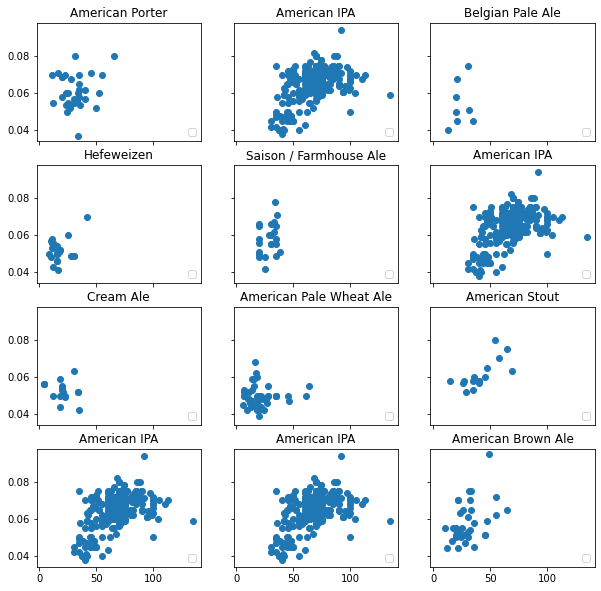

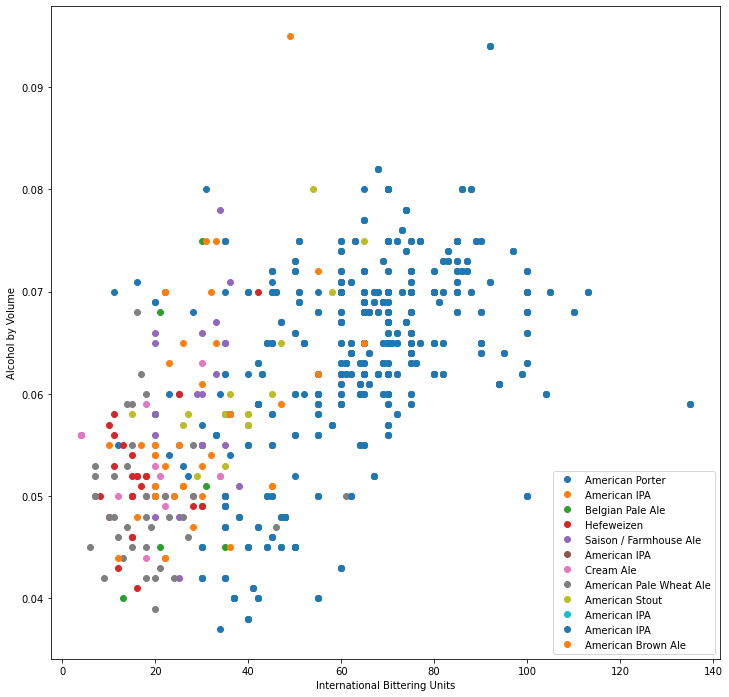

In [21]:
# One beer style by figure 
fig, axes = plt.subplots(4, 3, sharex = True, sharey = True, figsize=(10,10))

# All beers styles in one figure.
fig, global_ax = plt.subplots(figsize=(12,12))
plt.xlabel("International Bittering Units")
plt.ylabel("Alcohol by Volume")

# Get the max ibu value
x_max = beer_db["ibu"].max() 

# Get the max abv value
y_max = beer_db["abv"].max() 

for style, ax in zip(y_train, axes.ravel()):
    ibu_data = beer_db["ibu"][beer_db["style"] == style].values
    abv_data = beer_db["abv"][beer_db["style"] == style].values
    
    ax.set_title(style)
    ax.plot(ibu_data, abv_data, marker = 'o', linestyle = '')
    ax.legend(numpoints=1, loc='lower right', fontsize = 10)

    global_ax.plot(ibu_data, abv_data, marker = 'o', label=style, linestyle = '')

global_ax.legend(numpoints=1, loc='lower right', fontsize = 10)

plt.show()